# Time Series Classification using Logistic Regression LDA/QDA and Naive Bayes

### **Sitao Min**

## Time Series Classification
Classify the activities of humans based on time series obtained by a Wireless Sensor Network.

### (a). Download the AReM data 
from: https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\%29 . The dataset contains 7 folders that represent seven types of activities. In each folder, there are multiple files each of which represents an instant of a human performing an activity. Each file containis 6 time series collected from activities
of the same person. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.

### (b). Building Train and Test Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### make training data and testing data

In [11]:
import glob
path1 = './AReM/bending*/*[!(1,2)].csv'
path2 = './AReM/[c,s,l,w]*/*[!(1,2,3)].csv'
path3 = './AReM/[c,s,l,w]*/dataset[1,2,3][1,2,3].csv'
file1 = glob.glob(path1)
file2 = glob.glob(path2)
file3 = glob.glob(path3)

train_file = list()
train_file = file1+file2+file3
train_file.sort()
print("Training file size:%d" %len(train_file))

path4 = './AReM/bending*/dataset[1,2].csv'
path5 =  './AReM/[c,s,l,w]*/dataset[1,2,3].csv'
file4 = glob.glob(path4)
file5 = glob.glob(path5)

test_file = list()
test_file = file4+file5
test_file.sort()

print("Test file size:%d"%len(test_file))

Training file size:69
Test file size:19


### (c) Feature Extraction
Classification of time series usually needs extracting features from them time-domain

### i. time-domain features

- Means, Standard, Maximum and Minimum values
- Averaged Derivatives - The mean value of the first order derivatives of the signal over the window
- Cumulative integrals
- Skewness - The degree of asymmetry of the sensor signal distribution
- Kurtosis - The degree of peakedness of the sensor signal distribution
- Interquartile Range - Measure of the statistical dispersion, being equal to the difference between the 75th and the 25th percentiles of the signal over the window
- Zero Crossing Rate - The total number of times the signal changes from positive to negative or back or vice versa normalized by the window length
- Mean Crossing Rate - The total number of times the signal changes from below average to above average or vice versa normalized by the window length
- Pairwise Correlation - Correlation between two axes (channels) of each sensor and different sensors
Spectral Entropy - Measure of the distribution of frequency components

### ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile

In [ ]:
temp_df = train_df[train_df["label"]=="bending1"]
temp_df = temp_df[temp_df["file"]=="dataset3.csv"]
# extracted_features = extract_features(temp_df, column_id="avg_rss12", column_sort="time")
# extracted_features
count = -1
for column in temp_df.columns.drop(["file","label","time"]):
    count = count + 1
    loc = (count//3, count%3)
#     print(loc)
    plot_element = plt.subplot2grid(shape=(2,3), loc=loc, rowspan=1, colspan=1)
    plot_element.plot(temp_df["time"], temp_df[column])
    plot_element.set_title(column)
    plot_element.figure.set_figheight(10)
    plot_element.figure.set_figwidth(10)
# plt.plot(temp_df["time"], temp_df["avg_rss12"])
plt.tight_layout()
plt.show()

In [399]:
import glob
mypath = '/Users/apple/min/USC/INF552 Machine Learning/HW Assignment2/AReM/*/*.csv'
files = glob.glob(mypath)

In [400]:
len(files)

88

In [ ]:
fileRead = open(files[23], "r", encoding='utf-8')
lines = fileRead.readlines() 
fileRead.close()

out = open('./AReM/bending2/dataset4.csv', 'w',newline = '')
for line in lines:  
    if line[-2] == ' ':
        line = line[0:-2] + line[-1]
    line = line.replace(' ', ',')
    out.write(line)
out.close()

In [401]:
columns_name = []
for i in range(1,7):
    columns_name.append("min"+ str(i))
    columns_name.append("max"+ str(i))
    columns_name.append("mean"+ str(i))
    columns_name.append("median"+ str(i))
    columns_name.append("std"+ str(i))
    columns_name.append("1st quartile"+ str(i))
    columns_name.append("3rd quartile"+ str(i))

In [402]:
result_df = pd.DataFrame(np.zeros((len(files),42)), columns = columns_name)

In [542]:
for index,instance in enumerate(files):
        
    df = pd.read_table(instance,sep = ',',index_col = 0,skiprows=4, header = 0)
    df_des = df.describe()
    df_des = df_des.drop(['count'])
    df_des = df_des.reindex(["min","max","mean","50%","std","25%","75%"])
    df_des = df_des.T
    
    for i in range(0,len(df_des.index)):
        result_df.iloc[index,i*7:i*7+7] = df_des.iloc[i,:].values

In [ ]:
result_df.head()

In [ ]:
result_df.shape

### iii. Estimate the standard deviation of each of the time-domain. Build a bootsrap confidence interval

#### a. Standard Deviation of each features

In [404]:
feature_df = result_df
feature_df_std = result_df.describe().iloc[2,:]

In [405]:
std_df = pd.DataFrame(feature_df_std, columns=['std'])

In [406]:
std_df

,std
min1,11.665657
max1,20.638712
mean1,16.496679
median1,16.681423
std1,1.870589
1st quartile1,15.438126
3rd quartile1,17.616818
min2,0.000000
max2,5.291343
mean2,1.627056


#### b. Bootstrap Confident Interval of Standard Deviation for each features

In [543]:
from sklearn.utils import resample
import matplotlib.pyplot as plt

In [544]:
for index in range(0,len(feature_df.columns)):
    data = feature_df.iloc[:,index].values

    # configure bootstrap
    n_iterations = 1000
    n_size = int(len(data))

    # run bootstrap
    stats = list()

    for i in range(n_iterations):
        # prepare train and test sets
        resample_data = resample(data, n_samples=n_size)
        stats.append(np.std(resample_data))

    # confidence intervals
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    lower = np.percentile(stats, p)
    p = (alpha+((1.0-alpha)/2.0))*100
    upper = np.percentile(stats, p)
    
    print('%+14s : %.1f%% bootstrap CI: (%.1f, %.1f)' % (feature_df.columns[index],alpha*100, lower, upper))

          min1 : 95.0% bootstrap CI: (8.0, 10.9)
          max1 : 95.0% bootstrap CI: (3.1, 5.4)
         mean1 : 95.0% bootstrap CI: (4.6, 6.0)
       median1 : 95.0% bootstrap CI: (4.7, 6.1)
          std1 : 95.0% bootstrap CI: (1.5, 2.0)
 1st quartile1 : 95.0% bootstrap CI: (5.4, 6.7)
 3rd quartile1 : 95.0% bootstrap CI: (4.1, 6.0)
          min2 : 95.0% bootstrap CI: (0.0, 0.0)
          max2 : 95.0% bootstrap CI: (4.5, 5.4)
         mean2 : 95.0% bootstrap CI: (1.3, 1.7)
       median2 : 95.0% bootstrap CI: (1.2, 1.6)
          std2 : 95.0% bootstrap CI: (0.8, 0.9)
 1st quartile2 : 95.0% bootstrap CI: (0.8, 1.0)
 3rd quartile2 : 95.0% bootstrap CI: (1.8, 2.3)
          min3 : 95.0% bootstrap CI: (2.7, 3.1)
          max3 : 95.0% bootstrap CI: (4.1, 5.5)
         mean3 : 95.0% bootstrap CI: (3.2, 4.6)
       median3 : 95.0% bootstrap CI: (3.3, 4.6)
          std3 : 95.0% bootstrap CI: (0.7, 1.2)
 1st quartile3 : 95.0% bootstrap CI: (3.5, 4.8)
 3rd quartile3 : 95.0% bootstrap CI: (3

#### iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

We can choose min,mean and max as most important time-domain features

### (d) Binary Classification Using Logistic Regression

### i. Train.

#### Make training and testing datasets

In [545]:
df = pd.read_table(file1[1],sep = ',',index_col = 0,skiprows=4, header = 0)
df.describe()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,43.454958,0.378083,15.793333,0.849354,23.034792,0.679646
std,1.386098,0.315566,3.847638,0.995761,2.488862,0.622534
min,37.000000,0.000000,5.750000,0.000000,8.000000,0.000000
25%,42.500000,0.000000,13.000000,0.430000,22.250000,0.430000
50%,43.250000,0.470000,15.000000,0.500000,23.500000,0.500000
75%,45.000000,0.500000,18.270000,1.120000,24.000000,0.870000
max,48.000000,1.580000,27.000000,10.030000,33.500000,5.260000


In [546]:
def make_dataset(result_df, files_path,split_num, features, time_series):
    
    for index,instance in enumerate(files_path):
        
        #load data
        df = pd.read_table(instance,sep = ',',index_col = 0,skiprows=4, header = 0)
        
        # split each time series in multi part and combine in new dataframe
        chunk_size = round(df.shape[0]*1.0/(split_num*1.0))
        range_list = [i*chunk_size for i in range(1,split_num)]
        chunks = np.split(df, range_list)
        
        # make new feature dataset
        n_time_series = len(time_series)
        num_feature = len(features)
        
        for i, chunk in enumerate(chunks):
            chunk = chunk.describe()
            # drop unused features
            for feature in chunk.index:
                if feature not in features:
                    chunk = chunk.drop(feature)
            chunk = chunk.reindex(features)
            chunk = chunk.T
            for j,time_series_ix in enumerate(time_series):
                result_df.iloc[index*split_num+i, j*num_feature:(j+1)*num_feature]  = chunk.iloc[time_series_ix,:].values
    
    return result_df

In [547]:
def make_train_test_dataset(split_num, features, time_series):
    
    train_bending_file = file1
    train_other_file = file2+file3
    test_bending_file = file4
    test_other_file = file5
    
    columns_name = []
    for i in [i+1 for i in time_series]:  
        for feature_name in features:
            if(feature_name == '25%'):
                columns_name.append('oneQt' + str(i))
            elif(feature_name == '50%'):
                columns_name.append('median' + str(i))
            elif(feature_name =='75%'):
                columns_name.append('thrQt' + str(i))
            else:    
                columns_name.append(feature_name + str(i))
    
    
    num_features = len(time_series)*len(features)

    train_bending_df = pd.DataFrame(np.zeros((len(train_bending_file)*split_num, num_features)), columns = columns_name)
    train_other_df = pd.DataFrame(np.zeros((len(train_other_file)*split_num, num_features)), columns = columns_name)
    test_bending_df = pd.DataFrame(np.zeros((len(test_bending_file)*split_num, num_features)), columns = columns_name)
    test_other_df = pd.DataFrame(np.zeros((len(test_other_file)*split_num, num_features)), columns = columns_name)
    
    train_bending_df = make_dataset(train_bending_df, train_bending_file, split_num, features, time_series)
    train_other_df = make_dataset(train_other_df, train_other_file, split_num, features, time_series)
    test_other_df = make_dataset(test_other_df, test_other_file, split_num, features, time_series)
    test_bending_df = make_dataset(test_bending_df,test_bending_file, split_num, features, time_series)
    
    train_bending_df['target_value'] = 1
    train_other_df['target_value'] = 0
    test_bending_df['target_value'] = 1
    test_other_df['target_value'] = 0
    #print(train_bending_df.shape, train_other_df.shape,test_bending_df.shape,test_other_df.shape)
    
    train_df = pd.concat([train_bending_df, train_other_df],ignore_index= True)
    test_df = pd.concat([test_bending_df, test_other_df],ignore_index= True)
    print(train_df.shape, test_df.shape)
    
    return train_df,test_df

In [548]:
features = ['min','max','mean']
time_series = [0,1,5]
split_num = 1

train_df,test_df = make_train_test_dataset(split_num, features, time_series)

(69, 10) (19, 10)


In [549]:
train_df.head()

,min1,max1,mean1,min2,max2,mean2,min6,max6,mean6,target_value
0,36.25,48.00,43.969125,0.0,1.50,0.413125,0.0,2.96,0.555313,1
1,37.00,48.00,43.454958,0.0,1.58,0.378083,0.0,5.26,0.679646,1
2,33.00,47.75,42.179813,0.0,3.00,0.696042,0.0,2.18,0.613521,1
3,33.00,45.75,41.678063,0.0,2.83,0.535979,0.0,1.79,0.383292,1
4,35.00,47.40,43.954500,0.0,1.70,0.426250,0.0,1.79,0.493292,1


#### Make scatter Plot

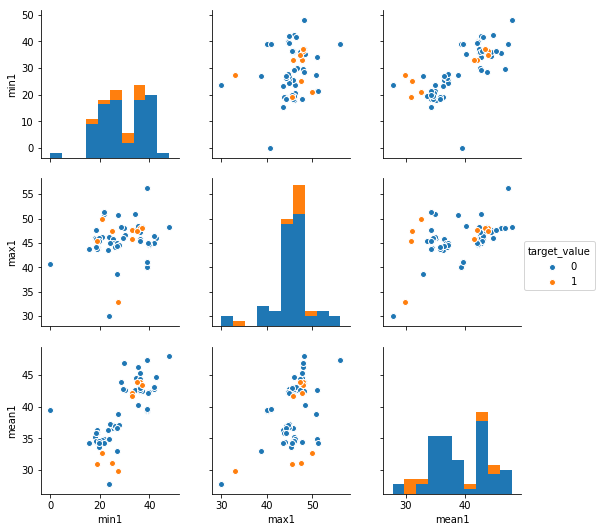

In [550]:
import seaborn as sns
sns.pairplot(train_df,hue='target_value',vars = ['min1','max1','mean1'],size = 2.5, aspect = 1)
plt.show()

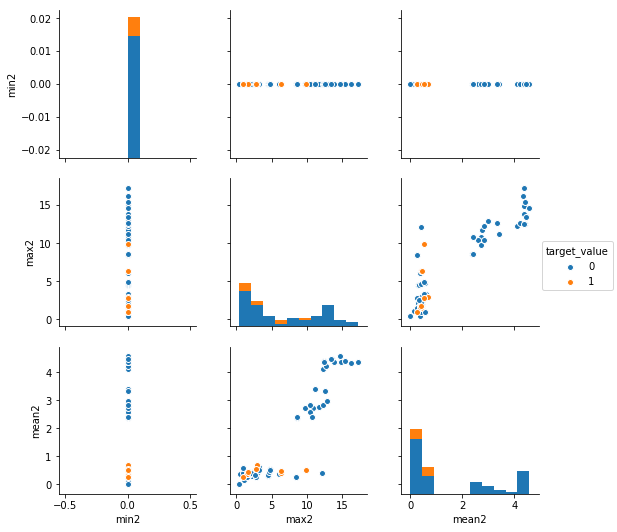

In [551]:
import seaborn as sns
sns.pairplot(train_df,hue='target_value',vars = ['min2','max2','mean2'],size = 2.5, aspect = 1)
plt.show()

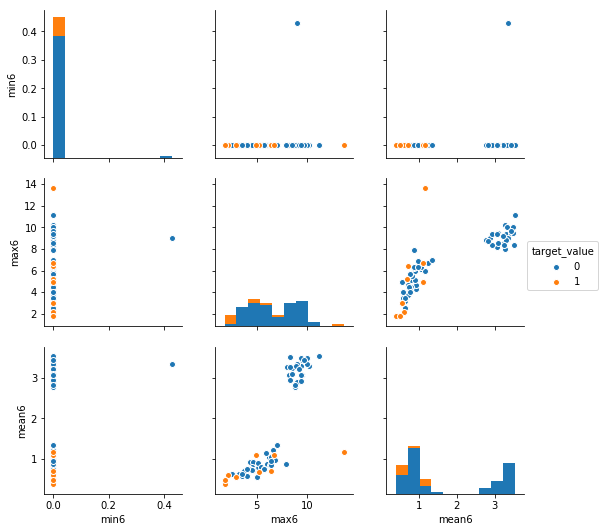

In [552]:
import seaborn as sns
sns.pairplot(train_df,hue='target_value',vars = ['min6','max6','mean6'],size = 2.5, aspect = 1)
plt.show()

#### ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the 88 instances, you have 12 time series for each instance. Repeat the experiment in 1(d)i. Do you see any considerable difference in the results with those of 1(d)i?

In [553]:
features = ['min','max','mean']
time_series = [0,1,5]
split_num = 2

train_df2,test_df2 = make_train_test_dataset(split_num, features, time_series)

(138, 10) (38, 10)


#### Make scatter plot

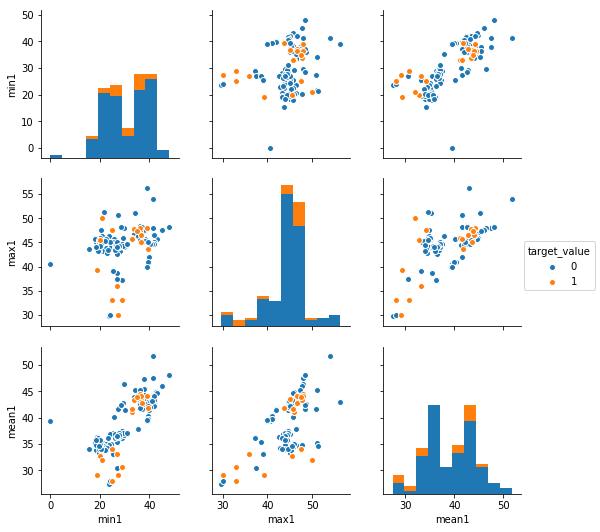

In [554]:
import seaborn as sns
sns.pairplot(train_df2,hue='target_value',vars = ['min1','max1','mean1'],size = 2.5, aspect = 1)
plt.show()

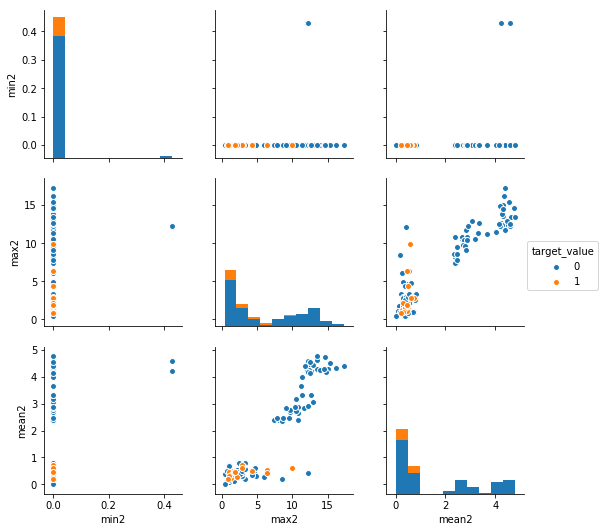

In [555]:
import seaborn as sns
sns.pairplot(train_df2,hue='target_value',vars = ['min2','max2','mean2'],size = 2.5, aspect = 1)
plt.show()

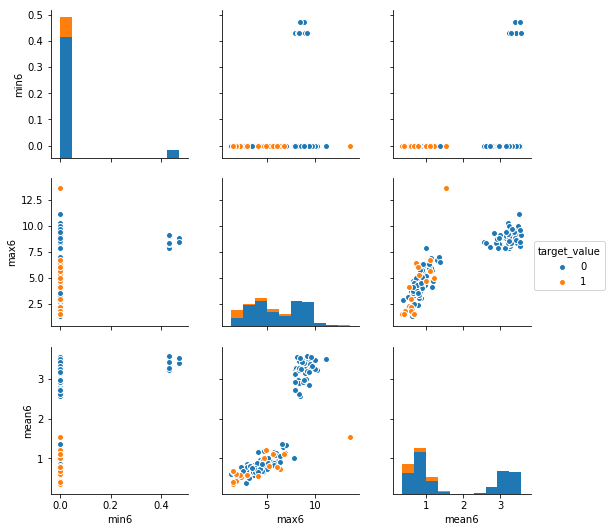

In [556]:
import seaborn as sns
sns.pairplot(train_df2,hue='target_value',vars = ['min6','max6','mean6'],size = 2.5, aspect = 1)
plt.show()

**There is some improvement in the dataset**

### iii. Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features. 

In [557]:
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

#### Using cross-validation and RFE to select features

In [637]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

grid_score_list = list()
for split_num in range(1,21):
    features = ['min','max','mean','std','25%','50%','75%']
    time_series = range(0,6)

    train_df,test_df = make_train_test_dataset(split_num, features, time_series) 
    X = train_df.iloc[:,0:len(train_df.columns.values)-1]
    y = train_df['target_value'].values

    estimator = LogisticRegression()
    rfecv = RFECV(estimator=estimator, step=1, cv=StratifiedKFold(5, shuffle = True, random_state = 0),
              scoring='accuracy')
    rfecv.fit(X, y)
    grid_score_list.append(max(rfecv.grid_scores_))

(69, 43) (19, 43)
(138, 43) (38, 43)
(207, 43) (57, 43)
(276, 43) (76, 43)
(345, 43) (95, 43)
(414, 43) (114, 43)
(483, 43) (133, 43)
(552, 43) (152, 43)
(621, 43) (171, 43)
(690, 43) (190, 43)
(759, 43) (209, 43)
(828, 43) (228, 43)
(897, 43) (247, 43)
(966, 43) (266, 43)
(1035, 43) (285, 43)
(1104, 43) (304, 43)
(1173, 43) (323, 43)
(1242, 43) (342, 43)
(1311, 43) (361, 43)
(1380, 43) (380, 43)


##### Compute optimal value of l

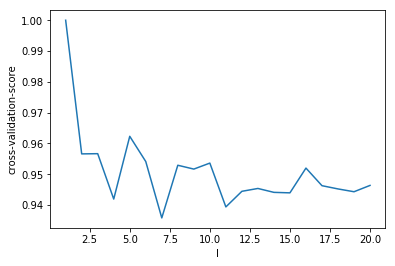

optimal value of l is : 1
best cv score is 1.000000


In [638]:
plt.plot(range(1, len(grid_score_list) + 1), grid_score_list)
plt.xlabel('l')
plt.ylabel('cross-validation-score')
plt.show()

for index,element in enumerate(grid_score_list):
    if element == max(grid_score_list):
            l = index+1
best_cv_score = max(grid_score_list)
print('optimal value of l is : %d' % l)
print('best cv score is %f'%best_cv_score)

##### Find selected features of optimal l

(69, 43) (19, 43)


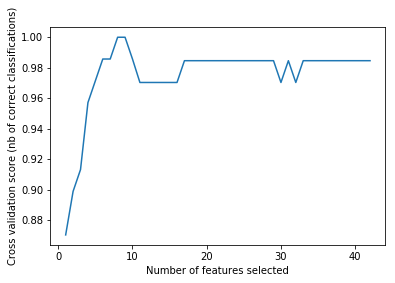

feature ranking:
[ 7 31  1 19 17 28  1 33  1 13 18 26 25  2 20  4 16 22 27  1  5 34 23 14
 30 21 11  6  1  1  1 29  1 10  8 32  1  9 24 15 12  3]
Selected Features:
[2, 6, 8, 19, 28, 29, 30, 32, 36]


In [639]:
features = ['min','max','mean','std','25%','50%','75%']
split_num = l
time_series = range(0,6)

train_df,test_df = make_train_test_dataset(split_num, features, time_series) 
X = train_df.iloc[:,0:len(train_df.columns.values)-1]
y = train_df['target_value'].values

estimator = LogisticRegression()
rfecv = RFECV(estimator=estimator, step=1, cv=StratifiedKFold(5, shuffle = True, random_state=0),
              scoring='accuracy')
rfecv.fit(X, y)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
print('feature ranking:')
print(rfecv.ranking_)
feature_ix = list()
print('Selected Features:')
for index, element in enumerate(rfecv.support_):
    if element == True:
        feature_ix.append(index)
print(feature_ix)        

### iv Confusion Matrix, ROC and AUC

##### Calculate model based on selected features

In [640]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
    
# building formula string
formula_str = 'target_value ~ '
for i in range(0,len(feature_ix)-1):
    formula_str += train_df.columns.values[feature_ix[i]] + ' + ' 
formula_str += train_df.columns.values[feature_ix[-1]]

glm_binom = smf.glm(formula = formula_str,data = train_df, family=sm.families.Binomial())
res = glm_binom.fit(maxiter= 20)
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           target_value   No. Observations:                   69
Model:                            GLM   Df Residuals:                       59
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 29 Jun 2018   Deviance:                          nan
Time:                        17:09:48   Pearson chi2:                 1.39e-07
No. Iterations:                    20   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -63.1636   6.09e+04     -0.001      0.999   -1.19e+05    1.19e+05
mean1         -1.2407   4488.240     -0.000      1.0

In [641]:
r_train = pandas2ri.py2ri(train_df)
# building formula string
formula_str = 'target_value ~ '

for i in range(0,len(feature_ix)-1):
    formula_str += train_df.columns.values[feature_ix[i]] + ' + ' 
formula_str += train_df.columns.values[feature_ix[-1]]
    
# train model using logistic regression
lr = r.glm( formula = formula_str , data = r_train, family = r.binomial(link = 'logit'))
summ = r.summary(lr)
coef = r.coef(summ)
print(coef)

               Estimate Std. Error       z value  Pr(>|z|)
(Intercept) -78.0182579  743198.22 -1.049764e-04 0.9999162
mean1        -1.3466100   57448.03 -2.344049e-05 0.9999813
thrQt1       -0.4700941   71237.41 -6.598978e-06 0.9999947
max2         -0.7957630   42204.76 -1.885482e-05 0.9999850
median3      -3.4260518   13580.07 -2.522852e-04 0.9997987
min5          4.6384748   33444.08  1.386935e-04 0.9998893
max5          5.9921836   30412.77  1.970286e-04 0.9998428
mean5         1.4795038  110925.80  1.333778e-05 0.9999894
oneQt5       -1.4461445   47907.55 -3.018615e-05 0.9999759
max6         -0.8530643   50451.76 -1.690851e-05 0.9999865



#### Confusion Matrix, ROC_curve and train accuracy

confusion matrix:
[[60  0]
 [ 0  9]]
roc_auc_score:
1.0
train_error:
0.0


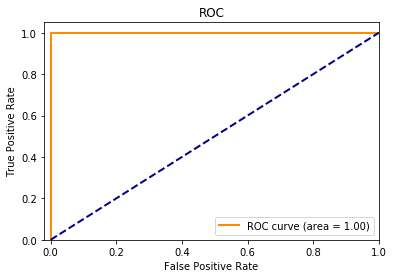

classification report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        60
          1       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00        69



In [642]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

X_train = train_df.iloc[:,feature_ix]
y_train = train_df['target_value']

lr = LogisticRegression()

# fitting the model
lr.fit(X_train, y_train)

# predict the response
y_train_pred = lr.predict(X_train)

# testing error
RFE_train_error = 1- metrics.accuracy_score(y_train,y_train_pred)
# confusion matrix 
print('confusion matrix:')
print(metrics.confusion_matrix(y_train,y_train_pred))

# roc_auc
print('roc_auc_score:')
print(roc_auc_score(y_train, y_train_pred))

# train_error
print('train_error:')
print(train_error)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_train, y_train_pred)
fpr = np.concatenate([[0],fpr])
tpr = np.concatenate([[0],tpr])

roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

# classification report
print('classification report:')
print(metrics.classification_report(y_train,y_train_pred))


#### v.Test the classifier on the test set. 

In [643]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train = train_df.iloc[:,feature_ix]
y_train = train_df['target_value']
X_test = test_df.iloc[:,feature_ix]
y_test = test_df['target_value']

lr = LogisticRegression()

# fitting the model
lr.fit(X_train, y_train)

# predict the response
y_train_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)

# testing error
RFE_test_error = 1- metrics.accuracy_score(y_test,y_pred)
RFE_test_accuracy = 1-test_error
print('testing_error:')
print(test_error)
# classification report
print('classification report:')
print(metrics.classification_report(y_test,y_pred))

# confusion matrix 
print('confusion matrix:')
print(metrics.confusion_matrix(y_test,y_pred))

print('testing accuracy: %f'%test_accuracy)
print('cross-validation accuracy: %f'%best_cv_score)

testing_error:
0.0
classification report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00        19

confusion matrix:
[[15  0]
 [ 0  4]]
testing accuracy: 1.000000
cross-validation accuracy: 1.000000


### (e) Binary Classification Using L1-penalized logistic regression

### i. using L1-penalized logistic regression

#### Cross-validation for L1 penalty and l

In [6]:
from sklearn.svm import l1_min_c
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [645]:
L1_grid_score_list = list()
L1_optimal_params_list = list()
for split_num in range(1,21):
    features = ['min','max','mean','std','25%','50%','75%']
    time_series = range(0,6)

    train_df,test_df = make_train_test_dataset(split_num, features, time_series) 
    
    # scale data
    X_train = train_df.iloc[:,0:len(train_df.columns.values)-1].values
    Y_train = train_df['target_value'].values.reshape(-1,1)
    X_train_std = StandardScaler().fit_transform(X_train)
    Y_train_std = Y_train.ravel()
    X_test = test_df.iloc[:,0:len(test_df.columns.values)-1].values
    Y_test = test_df['target_value'].values.reshape(-1,1)
    X_test_std = StandardScaler().fit_transform(X_test)
    Y_test_std = Y_test.ravel()

    # using cross-validation finding optimal parameters
    lower_bound = l1_min_c(X_train_std, Y_train_std, loss='log')
    estimator = LogisticRegression(penalty='l1', tol=0.01)
    
    C = np.logspace(lower_bound,4, 1000)
    
    tuned_parameters = [{'C': C}]
    n_folds = 5
    clf = GridSearchCV(estimator, tuned_parameters, cv=StratifiedKFold(n_folds), refit=False, scoring= 'accuracy')
    clf.fit(X_train_std,Y_train_std)
    print(split_num, clf.best_params_ , clf.best_score_)

    L1_grid_score_list.append(clf.best_score_)
    L1_optimal_params_list.append(clf.best_params_)

(69, 43) (19, 43)
1 {'C': 19.41384871719402} 0.9710144927536232
(138, 43) (38, 43)
2 {'C': 1.496230584546299} 0.9347826086956522
(207, 43) (57, 43)
3 {'C': 2.422296851153143} 0.9227053140096618
(276, 43) (76, 43)
4 {'C': 5.305960097980966} 0.9166666666666666
(345, 43) (95, 43)
5 {'C': 3.3369283087843504} 0.9188405797101449
(414, 43) (114, 43)
6 {'C': 1.4535733325567883} 0.9202898550724637
(483, 43) (133, 43)
7 {'C': 1.398125337671688} 0.9130434782608695
(552, 43) (152, 43)
8 {'C': 1.8916490474585654} 0.9112318840579711
(621, 43) (171, 43)
9 {'C': 1.7878666518872965} 0.9001610305958132
(690, 43) (190, 43)
10 {'C': 2.2486838405593845} 0.9072463768115943
(759, 43) (209, 43)
11 {'C': 1.0953905268486466} 0.9090909090909091
(828, 43) (228, 43)
12 {'C': 44.830116815458176} 0.9106280193236715
(897, 43) (247, 43)
13 {'C': 1.4029817747023394} 0.907469342251951
(966, 43) (266, 43)
14 {'C': 1.0834546082091117} 0.9130434782608695
(1035, 43) (285, 43)
15 {'C': 1.551242048827494} 0.9120772946859903
(

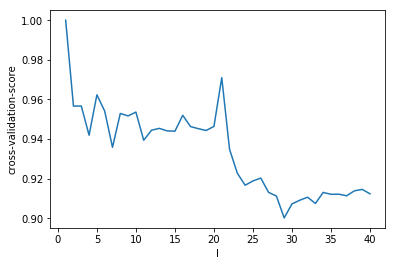

best l : 1 , best C : 18.046528.


In [651]:
plt.plot(range(1, len(L1_grid_score_list) + 1), L1_grid_score_list)
plt.xlabel('l')
plt.ylabel('cross-validation-score')
plt.show()

for i, score in enumerate(L1_grid_score_list):
    if score == max(L1_grid_score_list):
        L1_l = i+1
        L1_C = L1_optimal_params_list[i]['C']
print("best l : %d , best C : %f."%(L1_l,L1_C))

In [653]:
from sklearn import metrics
features = ['min','max','mean','std','25%','50%','75%']
split_num = L1_l
time_series = range(0,6)
train_df,test_df = make_train_test_dataset(split_num, features, time_series) 

X_train = train_df.iloc[:,0:len(train_df.columns.values)-1].values
Y_train = train_df['target_value'].values.reshape(-1,1)
X_train_std = StandardScaler().fit_transform(X_train)
Y_train_std = Y_train.ravel()
X_test = test_df.iloc[:,0:len(test_df.columns.values)-1].values
Y_test = test_df['target_value'].values.reshape(-1,1)
X_test_std = StandardScaler().fit_transform(X_test)
Y_test_std = Y_test.ravel()


clf_l1_LR = LogisticRegression(C=L1_C, penalty='l1', tol=0.01)
clf_l1_LR.fit(X_train_std, Y_train_std)

y_test_pred = clf_l1_LR.predict(X_test_std)
y_train_pred = clf_l1_LR.predict(X_train_std)

coef_l1_LR = l1_LR.coef_.ravel()
L1_sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
L1_training_accuracy = metrics.accuracy_score(Y_train_std, y_train_pred)
L1_testing_accuracy = metrics.accuracy_score(Y_test_std, y_test_pred)


print("Sparsity with L1 penalty: %.2f%%" % L1_sparsity_l1_LR)
print("Training score with L1 penalty: %.4f" % L1_training_accuracy)
print("Testing score with L1 penalty: %.4f" % L1_testing_accuracy)

(69, 43) (19, 43)
Sparsity with L1 penalty: 100.00%
Training score with L1 penalty: 1.0000
Testing score with L1 penalty: 0.9474


### ii.Compare the L1-penalized with variable selection using p-values.

In [655]:
print("p-value selection result:")
print("test_accuracy: %f" % RFE_test_accuracy)
print("L1-penalty LR result:")
print("test_accuracy: %f" % testing_accuracy)

p-value selection result:
test_accuracy: 1.000000
L1-penalty LR result:
test_accuracy: 0.947368


It is obvious that using backward selection has better performance but L1- penalty is easy to implement.

### (f) Multi-class Classification (The Realistic Case)

### i. L1 Logistic Regression

##### Making multiclass dataset

In [2]:
def make_multiclass_dataset(result_df, files_path, split_num, features, time_series):
    
    for index,instance in enumerate(files_path):
        
        if 'bending1' in instance:
            label = int(0)
        elif 'bending2' in instance:
            label = int(1)
        elif 'cycling' in instance:
            label = int(2)
        elif 'lying' in instance:
            label = int(3)
        elif 'sitting' in instance:
            label = int(4)
        elif 'standing' in instance:
            label = int(5)
        elif 'walking' in instance:
            label = int(6)
        else:
            print('error: label missing.')
        
        #load data
        df = pd.read_table(instance,sep = ',',index_col = 0,skiprows=4, header = 0)
        
        # split each time series in multi part and combine in new dataframe
        chunk_size = round(df.shape[0]*1.0/(split_num*1.0))
        range_list = [i*chunk_size for i in range(1,split_num)]
        chunks = np.split(df, range_list)
        
        # make new feature dataset
        n_time_series = len(time_series)
        num_feature = len(features)
        
        for i, chunk in enumerate(chunks):
            chunk = chunk.describe()
            # drop unused features
            for feature in chunk.index:
                if feature not in features:
                    chunk = chunk.drop(feature)
            chunk = chunk.reindex(features)
            chunk = chunk.T
            for j,time_series_ix in enumerate(time_series):
                result_df.iloc[index*split_num+i, j*num_feature:(j+1)*num_feature]  = chunk.iloc[time_series_ix,:].values
            result_df.iloc[index*split_num+i,-1] = int(label)
    
    return result_df

In [3]:
def make_multiclass_train_test_dataset(split_num, features, time_series, quiet = True):
    
    
    columns_name = []
    for i in [i+1 for i in time_series]:  
        for feature_name in features:
            if(feature_name == '25%'):
                columns_name.append('oneQt' + str(i))
            elif(feature_name == '50%'):
                columns_name.append('median' + str(i))
            elif(feature_name =='75%'):
                columns_name.append('thrQt' + str(i))
            else:    
                columns_name.append(feature_name + str(i))
    
    
    num_features = len(time_series)*len(features)
    num_label = 1
    columns_name.append('target_value')

    train_df = pd.DataFrame(np.zeros((len(train_file)*split_num, num_features+num_label)), columns = columns_name)
    test_df = pd.DataFrame(np.zeros((len(test_file)*split_num, num_features+num_label)), columns = columns_name)
    
    train_df = make_multiclass_dataset(train_df, train_file, split_num, features, time_series)
    test_df = make_multiclass_dataset(test_df,test_file, split_num, features, time_series)
    if(quiet == True):
        print(train_df.shape, test_df.shape)
    
    return train_df,test_df

### a.Multinomial regression

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [605]:
ml_grid_score_list = list()
ml_optimal_params_list = list()
for split_num in range(1,21):
    features = ['min','max','mean','std','25%','50%','75%']
    time_series = range(0,6)

    ml_train_df,ml_test_df = make_multiclass_train_test_dataset(split_num, features, time_series) 
    
    # scale data
    X_train = ml_train_df.iloc[:,0:len(ml_train_df.columns.values)-1].values
    Y_train = ml_train_df['target_value'].values.reshape(-1,1)
    X_train_std = StandardScaler().fit_transform(X_train)
    Y_train_std = Y_train.ravel()
    X_test = ml_test_df.iloc[:,0:len(ml_test_df.columns.values)-1].values
    Y_test = ml_test_df['target_value'].values.reshape(-1,1)
    X_test_std = StandardScaler().fit_transform(X_test)
    Y_test_std = Y_test.ravel()

    # using cross-validation finding optimal parameters
    lower_bound = l1_min_c(X_train_std, Y_train_std, loss='log')
    estimator = LogisticRegression(penalty='l1', tol=0.01, solver = 'saga',multi_class= 'multinomial')
    
    C = np.logspace(lower_bound,4, 50)
    
    tuned_parameters = [{'C': C}]
    n_folds = 5
    clf = GridSearchCV(estimator, tuned_parameters, cv=StratifiedKFold(n_folds), refit=False, scoring='accuracy')
    clf.fit(X_train_std,Y_train_std)
    print(split_num, clf.best_params_ , clf.best_score_)

    ml_grid_score_list.append(clf.best_score_)
    ml_optimal_params_list.append(clf.best_params_)

(69, 43) (19, 43)


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


1 {'C': 1.8865898088944537} 0.927536231884058
(138, 43) (38, 43)
2 {'C': 285.32263940694503} 0.8840579710144928
(207, 43) (57, 43)
3 {'C': 2232.148561156284} 0.8454106280193237
(276, 43) (76, 43)
4 {'C': 4722.136185167867} 0.8333333333333334
(345, 43) (95, 43)
5 {'C': 6.6304906572508004} 0.8521739130434782
(414, 43) (114, 43)
6 {'C': 3.1231387522235874} 0.8260869565217391
(483, 43) (133, 43)
7 {'C': 1.2196097994535093} 0.8074534161490683
(552, 43) (152, 43)
8 {'C': 2.139411928110492} 0.8242753623188406
(621, 43) (171, 43)
9 {'C': 1.2167498283043} 0.8099838969404187
(690, 43) (190, 43)
10 {'C': 3.1093752319845414} 0.8072463768115942
(759, 43) (209, 43)
11 {'C': 1.006886750187481} 0.8010540184453228
(828, 43) (228, 43)
12 {'C': 1.4651632824433984} 0.7995169082125604
(897, 43) (247, 43)
13 {'C': 1.4644833304326519} 0.8071348940914158
(966, 43) (266, 43)
14 {'C': 1.7664302634284825} 0.7939958592132506
(1035, 43) (285, 43)
15 {'C': 1.2127571322591941} 0.7961352657004831
(1104, 43) (304, 43)

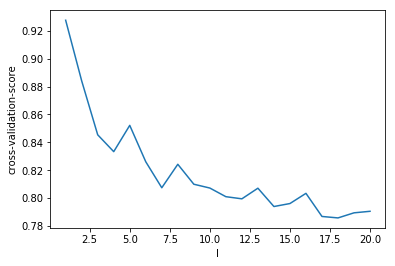

best l : 1 best C : 1.886590.


In [608]:
plt.figure(figsize = (6,4))
plt.plot(range(1, len(ml_grid_score_list) + 1), ml_grid_score_list)
plt.xlabel('l')
plt.ylabel('cross-validation-score')
plt.show()

for i, score in enumerate(ml_grid_score_list):
    if score == max(ml_grid_score_list):
        ml_l = i+1
        ml_C = ml_optimal_params_list[i]['C']
print("best l : %d best C : %f."%(ml_l,ml_C))

##### Tuning parameter in more accurate range 

In [676]:
features = ['min','max','mean','std','25%','50%','75%']
time_series = range(0,6)

ml_train_df,ml_test_df = make_multiclass_train_test_dataset(ml_l, features, time_series) 
    
# scale data
X_train = ml_train_df.iloc[:,0:len(ml_train_df.columns.values)-1].values
Y_train = ml_train_df['target_value'].values.reshape(-1,1)
X_train_std = StandardScaler().fit_transform(X_train)
Y_train_std = Y_train.ravel() 
X_test = ml_test_df.iloc[:,0:len(ml_test_df.columns.values)-1].values
Y_test = ml_test_df['target_value'].values.reshape(-1,1)
X_test_std = StandardScaler().fit_transform(X_test)
Y_test_std = Y_test.ravel()

# using cross-validation finding optimal parameters
estimator = LogisticRegression(penalty='l1', tol=0.01, solver = 'saga',multi_class= 'multinomial')
    
C = np.linspace(0.01,10.01, 1000)
    
tuned_parameters = [{'C': C}]
n_folds = 5
clf = GridSearchCV(estimator, tuned_parameters, cv=StratifiedKFold(n_folds,shuffle = True, random_state = 5), refit=False, scoring='accuracy')
clf.fit(X_train_std,Y_train_std)

print(clf.best_score_)
print(clf.best_params_)
ml_C = clf.best_params_['C']

(69, 43) (19, 43)
0.9130434782608695
{'C': 0.990980980980981}


In [14]:
from sklearn import metrics
features = ['min','max','mean','std','25%','50%','75%']
split_num = ml_l
time_series = range(0,6)

ml_train_df,ml_test_df = make_multiclass_train_test_dataset(split_num, features, time_series) 

X_train = ml_train_df.iloc[:,0:len(ml_train_df.columns.values)-1].values
Y_train = ml_train_df['target_value'].values.reshape(-1,1)
X_train_std = StandardScaler().fit_transform(X_train)
Y_train_std = Y_train.ravel()

X_test = ml_test_df.iloc[:,0:len(ml_test_df.columns.values)-1].values
Y_test = ml_test_df['target_value'].values.reshape(-1,1)
X_test_std = StandardScaler().fit_transform(X_test)
Y_test_std = Y_test.ravel()


clf_l1_LR = LogisticRegression(C = ml_C, penalty='l1', tol=0.01, solver = 'saga',multi_class= 'multinomial')
clf_l1_LR.fit(X_train_std, Y_train_std)

y_test_pred = clf_l1_LR.predict(X_test_std)
y_train_pred = clf_l1_LR.predict(X_train_std)

ml_coef_l1_LR = clf_l1_LR.coef_.ravel()
ml_sparsity_l1_LR = np.mean(ml_coef_l1_LR == 0) * 100
ml_training_accuracy = np.sum(y_train_pred == Y_train_std) / Y_train_std.shape[0]
ml_testing_accuracy = np.sum(y_test_pred == Y_test_std) / Y_test_std.shape[0]


print("Sparsity with L1 penalty: %.2f%%" % ml_sparsity_l1_LR)
print("Multiclass Training score with L1 penalty: %.4f" % ml_training_accuracy)
print("Multiclass Testing score with L1 penalty: %.4f" % ml_testing_accuracy)

(69, 43) (19, 43)
Sparsity with L1 penalty: 77.21%
Multiclass Training score with L1 penalty: 0.9855
Multiclass Testing score with L1 penalty: 0.9474


##### Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize = False, title='Confusion matrix',cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


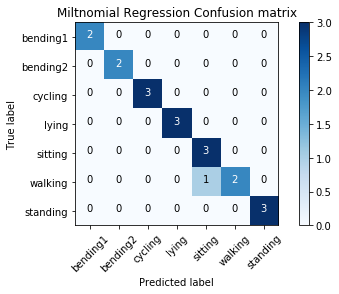

In [679]:
# Compute confusion matrix
ml_cnf_matrix = confusion_matrix(Y_test_std, y_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = ['bending1','bending2','cycling','lying','sitting','walking','standing']
plt.figure()
plot_confusion_matrix(ml_cnf_matrix, classes=class_names,title='Miltnomial Regression Confusion matrix')

plt.show()

##### ROC Curve

In [15]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from scipy import interp

def plot_roc_curve(estimator, class_names, X_train, Y_train, X_test, Y_test):
    # make binary dataset
    Y_train_bi = label_binarize(Y_train, classes=[0, 1, 2, 3, 4, 5, 6])
    Y_test_bi = label_binarize(Y_test, classes=[0, 1, 2, 3, 4, 5,6])
    
    n_classes = Y_train_bi.shape[1]

    classifier = OneVsRestClassifier(estimator)

    Y_score = classifier.fit(X_train, Y_train_bi).decision_function(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test_bi[:, i], Y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        fpr[i] = np.concatenate([[0.0],fpr[i]])
        tpr[i] = np.concatenate([[0.0],tpr[i]])


    # Plot all ROC curves
    lw = 2
    plt.figure()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','darkgreen','blue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve: {0} (area = {1:0.2f})'
                 ''.format(class_names[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

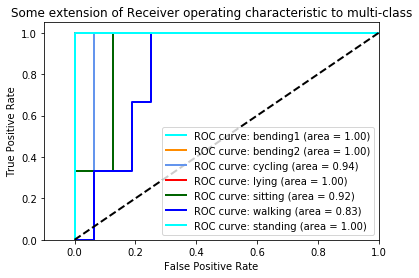

In [31]:
class_names = ['bending1','bending2','cycling','lying','sitting','walking','standing']
estimator = LogisticRegression(C = ml_C, penalty='l1', tol=0.01, solver = 'saga',multi_class= 'multinomial')
plot_roc_curve(estimator, class_names, X_train_std, Y_train_std, X_test_std, Y_test_std)

#### ii. Repeat 1(f)i using a Na ̈ıve Bayes’ classifier. Use both Gaussian and Multinomial priors and compare the results.

### (b) Naive Bayes with Gaussian

In [614]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

GBN_grid_score_list = list()
for split_num in range(1,21):
    features = ['min','max','mean','std','25%','50%','75%']
    time_series = range(0,6)

    ml_train_df,ml_test_df = make_multiclass_train_test_dataset(split_num, features, time_series) 
    
    # scale data
    X_train = ml_train_df.iloc[:,0:len(ml_train_df.columns.values)-1].values
    Y_train = ml_train_df['target_value'].values.reshape(-1,1).ravel()
    X_test = ml_test_df.iloc[:,0:len(ml_test_df.columns.values)-1].values
    Y_test = ml_test_df['target_value'].values.reshape(-1,1).ravel()

    # using cross-validation finding optimal parameters
    estimator = GaussianNB()

    n_folds = 5
    score = cross_val_score(estimator, X_train, Y_train, cv = StratifiedKFold(n_folds, shuffle = True, random_state = 0), scoring='accuracy')
    cv_score = np.sum(score)/len(score)
    print(split_num, cv_score)

    GBN_grid_score_list.append(cv_score)

(69, 43) (19, 43)
1 0.8199643493761141
(138, 43) (38, 43)
2 0.926943671021632
(207, 43) (57, 43)
3 0.8639925768822906
(276, 43) (76, 43)
4 0.854337102703709
(345, 43) (95, 43)
5 0.8405797101449275
(414, 43) (114, 43)
6 0.823166092449038
(483, 43) (133, 43)
7 0.8466885902725053
(552, 43) (152, 43)
8 0.8099416180150125
(621, 43) (171, 43)
9 0.8229200688756881
(690, 43) (190, 43)
10 0.7797101449275362
(759, 43) (209, 43)
11 0.8049017824926029
(828, 43) (228, 43)
12 0.7897530091355118
(897, 43) (247, 43)
13 0.7880189158135765
(966, 43) (266, 43)
14 0.8116541353383457
(1035, 43) (285, 43)
15 0.7806763285024154
(1104, 43) (304, 43)
16 0.7916741847549627
(1173, 43) (323, 43)
17 0.7791749635459948
(1242, 43) (342, 43)
18 0.7786756131592628
(1311, 43) (361, 43)
19 0.7856957533372627
(1380, 43) (380, 43)
20 0.8007246376811594


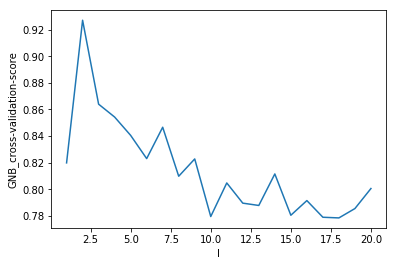

best l : 2.


In [615]:
plt.figure(figsize = (6,4))
plt.plot(range(1, len(GBN_grid_score_list) + 1), GBN_grid_score_list)
plt.xlabel('l')
plt.ylabel('GNB_cross-validation-score')
plt.show()

for i, score in enumerate(GBN_grid_score_list):
    if score == max(GBN_grid_score_list):
        GBN_l = i+1
print("best l : %d."%(GBN_l))

#### Accurancy , Confusion Matrix and ROC curve

In [18]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

features = ['min','max','mean','std','25%','50%','75%']
split_num = GBN_l
time_series = range(0,6)
ml_train_df,ml_test_df = make_multiclass_train_test_dataset(split_num, features, time_series) 

X_train = ml_train_df.iloc[:,0:len(ml_train_df.columns.values)-1].values
Y_train = ml_train_df['target_value'].values.reshape(-1,1)
Y_train = Y_train.ravel()
X_test = ml_test_df.iloc[:,0:len(ml_test_df.columns.values)-1].values
Y_test = ml_test_df['target_value'].values.reshape(-1,1)
Y_test = Y_test.ravel()


GNB = GaussianNB()
GNB.fit(X_train, Y_train)

y_test_pred = GNB.predict(X_test)
y_train_pred = GNB.predict(X_train)

GNB_training_accuracy = np.sum(y_train_pred == Y_train) / Y_train.shape[0]
GNB_testing_accuracy = np.sum(y_test_pred == Y_test) / Y_test.shape[0]


print("Gussian Naive Bayes Training score: %.4f" % GNB_training_accuracy)
print("Gussian Naive Bayes Testing score: %.4f" % GNB_testing_accuracy)

(138, 43) (38, 43)
Gussian Naive Bayes Training score: 0.9565
Gussian Naive Bayes Testing score: 0.8947


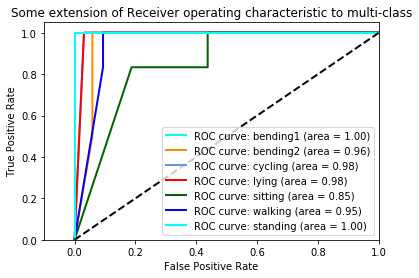

In [20]:
# plot Roc-curve
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from scipy import interp

def NB_plot_roc_curve(estimator, class_names, X_train, Y_train, X_test, Y_test):
    # make binary dataset
    Y_train_bi = label_binarize(Y_train, classes=[0, 1, 2, 3, 4, 5, 6])
    Y_test_bi = label_binarize(Y_test, classes=[0, 1, 2, 3, 4, 5, 6])
    
    n_classes = Y_train_bi.shape[1]

    classifier = OneVsRestClassifier(estimator)

    Y_score = classifier.fit(X_train, Y_train_bi).predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test_bi[:, i], Y_score[:, i])
        fpr[i] = np.concatenate([[0.0],fpr[i]])
        tpr[i] = np.concatenate([[0.0],tpr[i]])


        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    lw = 2
    plt.figure()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','darkgreen','blue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve: {0} (area = {1:0.2f})'
                 ''.format(class_names[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()


class_names = ['bending1','bending2','cycling','lying','sitting','walking','standing']
estimator = GaussianNB()
NB_plot_roc_curve(estimator, class_names, X_train, Y_train, X_test, Y_test)

Confusion matrix, without normalization


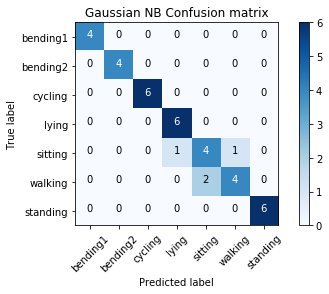

In [23]:
# Compute confusion matrix
GNB_cnf_matrix = confusion_matrix(Y_test, y_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = ['bending1','bending2','cycling','lying','sitting','walking','standing']
plt.figure()
plot_confusion_matrix(GNB_cnf_matrix, classes=class_names,title='Gaussian NB Confusion matrix')

plt.show()

### (c) Multinomial priors  Naive Bayes

In [619]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
MNB_grid_score_list = list()
MNB_optimal_params_list = list()

for split_num in range(1,21):
    features = ['min','max','mean','std','25%','50%','75%']
    time_series = range(0,6)

    ml_train_df,ml_test_df = make_multiclass_train_test_dataset(split_num, features, time_series) 
    
    # scale data
    X_train = ml_train_df.iloc[:,0:len(ml_train_df.columns.values)-1].values
    Y_train = ml_train_df['target_value'].values.reshape(-1,1)
    X_train_std = X_train
    #MinMaxScaler().fit_transform(X_train)
    Y_train_std = Y_train.ravel()
    X_test = ml_test_df.iloc[:,0:len(ml_test_df.columns.values)-1].values
    Y_test = ml_test_df['target_value'].values.reshape(-1,1)
    X_test_std = X_test
    #MinMaxScaler().fit_transform(X_test)
    Y_test_std = Y_test.ravel()

    # using cross-validation finding optimal parameters
    estimator = MultinomialNB()
    
    alpha = np.linspace(0.1,10.1,100)
    
    tuned_parameters = [{'alpha': alpha}]
    n_folds = 5
    MNB = GridSearchCV(estimator, tuned_parameters, cv=StratifiedKFold(n_folds), refit=False, scoring='accuracy')
    MNB.fit(X_train_std,Y_train_std)
    print(split_num, MNB.best_params_ , MNB.best_score_)

    MNB_grid_score_list.append(MNB.best_score_)
    MNB_optimal_params_list.append(MNB.best_params_)

(69, 43) (19, 43)
1 {'alpha': 3.4333333333333336} 0.855072463768116
(138, 43) (38, 43)
2 {'alpha': 0.40303030303030307} 0.7753623188405797
(207, 43) (57, 43)
3 {'alpha': 6.261616161616161} 0.7681159420289855
(276, 43) (76, 43)
4 {'alpha': 9.493939393939394} 0.7463768115942029
(345, 43) (95, 43)
5 {'alpha': 3.231313131313131} 0.744927536231884
(414, 43) (114, 43)
6 {'alpha': 8.685858585858586} 0.7463768115942029
(483, 43) (133, 43)
7 {'alpha': 1.4131313131313132} 0.7163561076604554
(552, 43) (152, 43)
8 {'alpha': 0.20101010101010103} 0.7355072463768116
(621, 43) (171, 43)
9 {'alpha': 7.069696969696969} 0.7230273752012882
(690, 43) (190, 43)
10 {'alpha': 9.897979797979797} 0.717391304347826
(759, 43) (209, 43)
11 {'alpha': 9.291919191919192} 0.7154150197628458
(828, 43) (228, 43)
12 {'alpha': 10.1} 0.7137681159420289
(897, 43) (247, 43)
13 {'alpha': 6.665656565656565} 0.7146042363433668
(966, 43) (266, 43)
14 {'alpha': 7.877777777777777} 0.7111801242236024
(1035, 43) (285, 43)
15 {'alpha

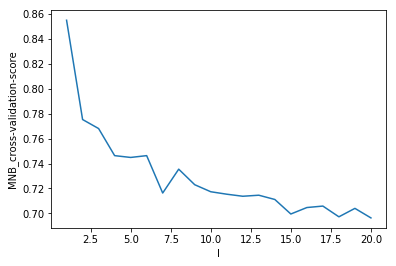

best l : 1 best alpha: 3.433333.


In [620]:
plt.figure(figsize = (6,4))
plt.plot(range(1, len(MNB_grid_score_list) + 1), MNB_grid_score_list)
plt.xlabel('l')
plt.ylabel('MNB_cross-validation-score')
plt.show()

for i, score in enumerate(MNB_grid_score_list):
    if score == max(MNB_grid_score_list):
        MNB_l = i+1
        MNB_al = MNB_optimal_params_list[i]['alpha']
        
print("best l : %d best alpha: %f."%(MNB_l, MNB_al))

#### Turning parameter in more accurate range

In [684]:
features = ['min','max','mean','std','25%','50%','75%']
time_series = range(0,6)

ml_train_df,ml_test_df = make_multiclass_train_test_dataset(MNB_l, features, time_series) 
    
# scale data
X_train = ml_train_df.iloc[:,0:len(ml_train_df.columns.values)-1].values
Y_train = ml_train_df['target_value'].values.reshape(-1,1)
X_train_std = X_train
#MinMaxScaler().fit_transform(X_train)
Y_train_std = Y_train.ravel()
X_test = ml_test_df.iloc[:,0:len(ml_test_df.columns.values)-1].values
Y_test = ml_test_df['target_value'].values.reshape(-1,1)
X_test_std = X_test
#MinMaxScaler().fit_transform(X_test)
Y_test_std = Y_test.ravel()

# using cross-validation finding optimal parameters
estimator = MultinomialNB()
    
alpha = np.linspace(0.1,10.1,1000)
    
tuned_parameters = [{'alpha': alpha}]
n_folds = 5
MNB = GridSearchCV(estimator, tuned_parameters, cv=StratifiedKFold(n_folds,shuffle = True, random_state = 5), refit=False, scoring='accuracy')
MNB.fit(X_train_std,Y_train_std)

print(MNB.best_score_)
print(MNB.best_params_)
mnb_a = MNB.best_params_['alpha']

(69, 43) (19, 43)
0.855072463768116
{'alpha': 0.2001001001001001}


#### Accurancy , Confusion Matrix and ROC curve

In [24]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

features = ['min','max','mean','std','25%','50%','75%']
split_num = MNB_l
time_series = range(0,6)
ml_train_df,ml_test_df = make_multiclass_train_test_dataset(split_num, features, time_series) 

X_train = ml_train_df.iloc[:,0:len(ml_train_df.columns.values)-1].values
Y_train = ml_train_df['target_value'].values.reshape(-1,1)
X_train_std = X_train
#MinMaxScaler().fit_transform(X_train)
Y_train_std = Y_train.ravel()
X_test = ml_test_df.iloc[:,0:len(ml_test_df.columns.values)-1].values
Y_test = ml_test_df['target_value'].values.reshape(-1,1)
X_test_std = X_test
#MinMaxScaler().fit_transform(X_test)
Y_test_std = Y_test.ravel()


MNB = MultinomialNB(alpha = mnb_a)
MNB.fit(X_train_std, Y_train_std)

y_test_pred = MNB.predict(X_test_std)
y_train_pred = MNB.predict(X_train_std)

MNB_training_accuracy = np.sum(y_train_pred == Y_train_std) / Y_train_std.shape[0]
MNB_testing_accuracy = np.sum(y_test_pred == Y_test_std) / Y_test_std.shape[0]


print("Multinomial Naive Bayes Training score: %.4f" % MNB_training_accuracy)
print("Multinomial Naive Bayes Testing score: %.4f" % MNB_testing_accuracy)

(69, 43) (19, 43)
Multinomial Naive Bayes Training score: 0.9275
Multinomial Naive Bayes Testing score: 0.8947


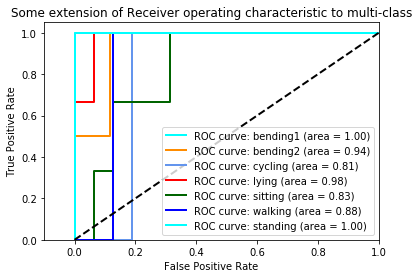

In [26]:
# plot Roc-curve
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from scipy import interp

def NB_plot_roc_curve(estimator, class_names, X_train, Y_train, X_test, Y_test):
    # make binary dataset
    Y_train_bi = label_binarize(Y_train, classes=[0, 1, 2, 3, 4, 5, 6])
    Y_test_bi = label_binarize(Y_test, classes=[0, 1, 2, 3, 4, 5, 6])
    
    n_classes = Y_train_bi.shape[1]

    classifier = OneVsRestClassifier(estimator)

    Y_score = classifier.fit(X_train, Y_train_bi).predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test_bi[:, i], Y_score[:, i])
        fpr[i] = np.concatenate([[0.0],fpr[i]])
        tpr[i] = np.concatenate([[0.0],tpr[i]])

        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    lw = 2
    plt.figure()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','darkgreen','blue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve: {0} (area = {1:0.2f})'
                 ''.format(class_names[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

class_names = ['bending1','bending2','cycling','lying','sitting','walking','standing']
estimator = MultinomialNB(alpha = mnb_a)
NB_plot_roc_curve(estimator, class_names, X_train_std, Y_train_std, X_test_std, Y_test_std)

Confusion matrix, without normalization


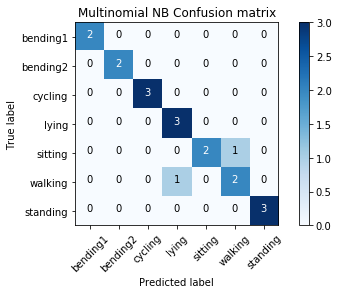

In [27]:
# Compute confusion matrix
MNB_cnf_matrix = confusion_matrix(Y_test_std, y_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = ['bending1','bending2','cycling','lying','sitting','walking','standing']
plt.figure()
plot_confusion_matrix(MNB_cnf_matrix, classes=class_names,title='Multinomial NB Confusion matrix')

plt.show()

#### iii. Which method is better for multi-class classification in this problem?

In [688]:
def test_multiclass_model(estimator,l,scaler):
    features = ['min','max','mean','std','25%','50%','75%']
    split_num = l
    time_series = range(0,6)
    ml_train_df,ml_test_df = make_multiclass_train_test_dataset(split_num, features, time_series,quiet=True) 

    X_train = ml_train_df.iloc[:,0:len(ml_train_df.columns.values)-1].values
    Y_train = ml_train_df['target_value'].values.reshape(-1,1)
    if scaler != None:
        X_train_std = scaler().fit_transform(X_train)
    else:
        X_train_std = X_train
    
    Y_train_std = Y_train.ravel()
    X_test = ml_test_df.iloc[:,0:len(ml_test_df.columns.values)-1].values
    Y_test = ml_test_df['target_value'].values.reshape(-1,1)
    if scaler != None:
        X_test_std = scaler().fit_transform(X_test)
    else:
        X_test_std = X_test
    Y_test_std = Y_test.ravel()


    estimator = estimator.fit(X_train_std, Y_train_std)

    y_test_pred = estimator.predict(X_test_std)
    y_train_pred = estimator.predict(X_train_std)
    
    testing_accuracy = np.sum(y_test_pred == Y_test_std) / Y_test.shape[0]
    
    return testing_accuracy

In [689]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
print('Best test result of each classifier：')
print('--------------------------------------------------------------')
print("Multinomial Regression: %.4f" % ml_testing_accuracy)
print("Gaussion Naive Bayes: %.4f" % GNB_testing_accuracy)
print("Multinomial Naive Bayes: %.4f" % MNB_testing_accuracy)

Best test result of each classifier：
--------------------------------------------------------------
Multinomial Regression: 0.9474
Gaussion Naive Bayes: 0.8947
Multinomial Naive Bayes: 0.8947


In [629]:
mlr_test_r = []
gnb_test_r = []
mnb_test_r = []
L = range(1,21)

for l in L:
    
    C = ml_optimal_params_list[l-1]['C']
    mlr = LogisticRegression(C = ml_C, penalty='l1', tol=0.01, solver = 'saga',multi_class= 'multinomial')
    gnb = GaussianNB()
    mnb_al = MNB_optimal_params_list[l-1]['alpha']
    mnb = MultinomialNB(alpha = mnb_al)
    
    mlr_test_r.append(test_multiclass_model(mlr,l,StandardScaler))
    gnb_test_r.append(test_multiclass_model(gnb,l,None))
    mnb_test_r.append(test_multiclass_model(mnb,l,None))

(69, 43) (19, 43)
(69, 43) (19, 43)
(69, 43) (19, 43)
(138, 43) (38, 43)
(138, 43) (38, 43)
(138, 43) (38, 43)
(207, 43) (57, 43)
(207, 43) (57, 43)
(207, 43) (57, 43)
(276, 43) (76, 43)
(276, 43) (76, 43)
(276, 43) (76, 43)
(345, 43) (95, 43)
(345, 43) (95, 43)
(345, 43) (95, 43)
(414, 43) (114, 43)
(414, 43) (114, 43)
(414, 43) (114, 43)
(483, 43) (133, 43)
(483, 43) (133, 43)
(483, 43) (133, 43)
(552, 43) (152, 43)
(552, 43) (152, 43)
(552, 43) (152, 43)
(621, 43) (171, 43)
(621, 43) (171, 43)
(621, 43) (171, 43)
(690, 43) (190, 43)
(690, 43) (190, 43)
(690, 43) (190, 43)
(759, 43) (209, 43)
(759, 43) (209, 43)
(759, 43) (209, 43)
(828, 43) (228, 43)
(828, 43) (228, 43)
(828, 43) (228, 43)
(897, 43) (247, 43)
(897, 43) (247, 43)
(897, 43) (247, 43)
(966, 43) (266, 43)
(966, 43) (266, 43)
(966, 43) (266, 43)
(1035, 43) (285, 43)
(1035, 43) (285, 43)
(1035, 43) (285, 43)
(1104, 43) (304, 43)
(1104, 43) (304, 43)
(1104, 43) (304, 43)
(1173, 43) (323, 43)
(1173, 43) (323, 43)
(1173, 43)

Training testing performance each classifier based on l:
--------------------------------------------------------------


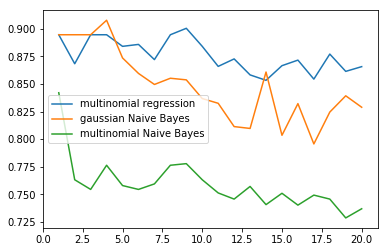

In [630]:
print('Training testing performance each classifier based on l:')
print('--------------------------------------------------------------')
plt.plot(L,mlr_test_r, label = 'multinomial regression')
plt.plot(L,gnb_test_r, label = 'gaussian Naive Bayes')
plt.plot(L,mnb_test_r, label = 'multinomial Naive Bayes')
plt.xlim(0,21)
plt.legend()
plt.show()    

From result shows above, for test dataset, it seems multinomial regression is best for most of L(split number).So, using the parameter chosen from cross-validatin for three classfier **multinomial regression classifier  has best test accuracy (89.4%)**